
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp; <b>STELLA - Infrastructures for Living Labs </b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp; https://stella-project.org/ 

# Participant Guideline
## Implementing Experimental System for <b style="color:orange">Recommendation</b>
Steps to implement a dockerize application for participating in Living Lab for evaluating your REC systems in a live environment of gesis search which is a search engine for finding information about social science research data and open access publications. 

## Table of Contents



0.  [prerequisite](#10)<br> 
1.  [Data](#0)<br>
2.  [Implementing Ranking Algorithm](#1)<br>
3.  [Implementing Dockerize Flask App](#2)<br>
4.  [Next Steps](#4)<br>

    <hr>

# Prerequisite <a id="10"></a>
-  Git
-  Install Docker
-  Add user to Docker group

<b> Optional </b>
- Anaconda
- pycharm




- Clone [Participant_Recommendation](https://github.com/stella-project/Participand_Recommendation.git):

```console
git clone https://github.com/stella-project/Participand_Recommendation.git
```


### Some helpful Links

- [Video](https://drive.google.com/file/d/1_Zuw7cxeVP-vDoLUknm96nJI28AP-tnR/view?usp=sharing)
- [stella-micro-template](https://github.com/stella-project/stella-micro-template)
- [Gesis-Search dataset](https://th-koeln.sciebo.de/s/OBm0NLEwz1RYl9N)
- [PyCharm IDE](https://www.jetbrains.com/de-de/pycharm/)
- [Get Docker](https://docs.docker.com/get-docker/)


<hr>

# 1.Data <a id="0"></a>
-  A corpus od <b>publication 93k</b> and <b>Research data 83k</b> metadata from GESIS Leibniz Institute for the Social Sciences
-  Metadata in different languages (mixed and separated)

In [58]:
!cd data && mkdir gesis-search && mkdir gesis-search/datasets && mkdir gesis-search/documents

!wget -O gesis-search/datasets/dataset.jsonl \
https://th-koeln.sciebo.de/s/OBm0NLEwz1RYl9N/download?path=%2Fgesis-search%2Fdatasets&files=dataset.jsonl -Q --show-progress
    
!wget -O gesis-search/documents.jsonl \
https://th-koeln.sciebo.de/s/OBm0NLEwz1RYl9N/download?path=%2Fgesis-search%2Fdocuments&files=publication.jsonl -Q --show-progress
    
!chown -R 775 data/* 

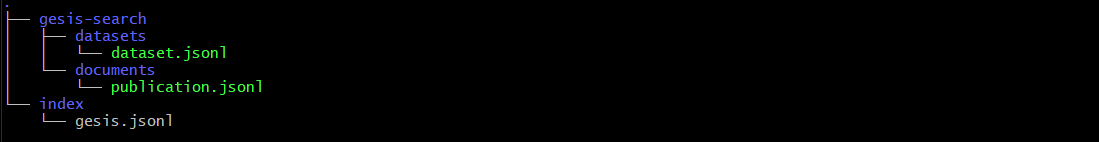

In [103]:
PATH = "./data/gesis-search/"

In [65]:
import json
import jsonlines
import pandas as pd
import numpy as np
import pickle
import random

pd.set_option("display.max_columns", None)

In [104]:
with jsonlines.open(PATH+"publications/publication.jsonl") as f :
    pub = [obj for obj in f]

with jsonlines.open(PATH+"datasets/dataset.jsonl") as f2 :
    dataset = [obj for obj in f2]

In [87]:
pubdf = pd.DataFrame(pub)
pubdf = pubdf.set_index('id')

In [88]:
datasetdf = pd.DataFrame(dataset)
datasetdf = datasetdf.set_index('id')

In [89]:
print("Number of publication: ",len(pubdf))
print("Metadata are: " ,list(pubdf.columns))
pubdf.head(3)


Number of publication:  93953
Metadata are:  ['title', 'abstract', 'topic', 'person', 'links', 'subtype', 'document_type', 'coreAuthor', 'doi', 'date']


,title,abstract,topic,person,links,subtype,document_type,coreAuthor,doi,date
id,,,,,,,,,,
gesis-ssoar-1002,"New Concerns, More Cooperation? How Non-Tradit...",None,"[Indien, Wirtschaftsbeziehungen, bilaterale Be...","[Biba, Sebastian]","[{'label': 'Link', 'link': 'https://journals.s...",journal_article,Zeitschriftenaufsatz,"[Biba, Sebastian]",None,2016
gesis-ssoar-1006,Buddhism in Current China-India Diplomacy,Buddhism is being emphasised strongly in both ...,"[China, Indien, bilaterale Beziehungen, Außenp...","[Scott, David]","[{'label': 'Link', 'link': 'https://journals.s...",journal_article,Zeitschriftenaufsatz,"[Scott, David]",None,2016
gesis-ssoar-10066,Zukunftsaufgaben der Humanisierung des Arbeits...,"Das seit 1974 vom BMFT geförderte Programm ""Fr...","[Arbeitswelt, Technik, Rationalisierung, Arbei...","[Altmann, Norbert, Düll, Klaus, Lutz, Burkart]","[{'label': 'Link', 'link': 'http://www.ssoar.i...",book,Buch,"[Altmann, Norbert, Düll, Klaus, Lutz, Burkart]",None,1987


In [45]:
print("Number of Research Data: ",len(datasetdf))
print("Metadata are: " ,list(datasetdf.columns))
datasetdf.head(3)

Number of Research Data:  83225
Metadata are:  ['title', 'subtype', 'abstract', 'person', 'time_collection', 'countries_collection', 'methodology_collection', 'universe', 'selection_method', 'doi', 'publication_year', 'topic']


,title,subtype,abstract,person,time_collection,countries_collection,methodology_collection,universe,selection_method,doi,publication_year,topic
id,,,,,,,,,,,,
ZA0018,Einstellung zur Wehrbereitschaft und Demokrati...,dbk,Vergleichsstudie bei der Zivilbevölkerung zu e...,None,10.1960 - 11.1960,[Deutschland],Mündliche Befragung mit standardisiertem Frage...,Alter: 16 Jahre und älter.,Mehrstufige Zufallsauswahl \r\n,doi:10.4232/1.11581,2013,"[Konflikte, Sicherheit und Frieden, Politische..."
ZA0025,Einstellung zur Monarchie (Niederlande)\r\n,dbk,Einstellung der Niederländer zu den Deutschen ...,None,06.1965 - 07.1965,[Niederlande],Mündliche Befragung mit standardisiertem Frage...,Alter: 20 Jahre und älter,Quotenauswahl,doi:10.4232/1.0025,1965,[Politische Verhaltensweisen und Einstellungen...
ZA0042,Politische Einstellungen (Juni 1966)\r\n,dbk,Beurteilung der Parteien.<br/><br/>Themen: Beu...,None,06.1966 - 07.1966,[Deutschland],Mündliche Befragung mit standardisiertem Frage...,Alter: 16-79 Jahre,Mehrstufige Zufallsauswahl \r\n,doi:10.4232/1.0042,1966,[Politische Verhaltensweisen und Einstellungen...


<hr>

# 2. Implementing Ranking Algorithm <a id="2"></a>

In the following we implement a simple app to create randomize recommendation for every publication. You will find out how simple it is.

In [105]:
idx = []
with jsonlines.open('./data/gesis-search/datasets/dataset.jsonl') as reader:
    for obj in reader:
           idx.append(obj.get('id'))

In [110]:
def recommend_datasets(item_id, page, rpp):
    itemlist = random.choices(idx, k=rpp)

    return {
        'page': page,
        'rpp': rpp,
        'item_id': item_id,
        'itemlist': itemlist,
        'num_found': len(itemlist)
    }


In [111]:
recommend_datasets("gesis-ssoar-1002", 1, 5)

{'page': 1,
 'rpp': 5,
 'item_id': 'gesis-ssoar-1002',
 'itemlist': ['datasearch-httpseasy-dans-knaw-nloai--oaieasy-dans-knaw-nleasy-dataset32489',
  'datasearch-httpseasy-dans-knaw-nloai--oaieasy-dans-knaw-nleasy-dataset76673',
  'ZA5859',
  'ZA8682',
  'datasearch-httpwww-da-ra-deoaip--oaioai-da-ra-de4527'],
 'num_found': 5}

<hr>

# 3.Implementing Dockerize Flask App <a id="2"></a>


## Application structure

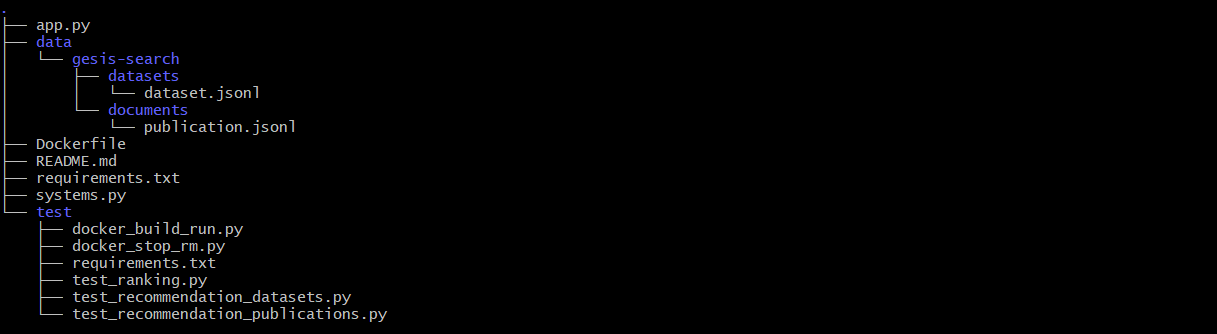

## API Endpoints 

### Endpoints

- `GET /test`: print the name o container

- `GET /index`: index the data for retrieval
- `GET /recommendation/datasets?<string:item_id>`: Retrieve a ranking corresponding to the query specified at the endpoint. A JSON object with maximally 10 entries will be returned.


## app.py

you don't need to change this file

In [ ]:
from flask import Flask, request, jsonify
from systems import Ranker, Recommender


app = Flask(__name__)
ranker = Ranker()
recommender = Recommender()


@app.route('/test', methods=["GET"])
def test():
    return 'Container is running', 200


@app.route('/index', methods=["GET"])
def index():
    ranker.index()
    recommender.index()
    return 'Indexing done!', 200


@app.route('/ranking', methods=["GET"])
def ranking():
    query = request.args.get('query', None)
    page = request.args.get('page', default=0, type=int)
    rpp = request.args.get('rpp', default=20, type=int)
    response = ranker.rank_publications(query, page, rpp)
    return jsonify(response)


@app.route('/recommendation/datasets', methods=["GET"])
def rec_data():
    item_id = request.args.get('item_id', None)
    page = request.args.get('page', default=0, type=int)
    rpp = request.args.get('rpp', default=20, type=int)
    response = recommender.recommend_datasets(item_id, page, rpp)
    return jsonify(response)


@app.route('/recommendation/publications', methods=["GET"])
def rec_pub():
    item_id = request.args.get('item_id', None)
    page = request.args.get('page', default=0, type=int)
    rpp = request.args.get('rpp', default=20, type=int)
    response = recommender.recommend_publications(item_id, page, rpp)
    return jsonify(response)


if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000, debug=True)

## system.py

In [ ]:
import jsonlines
import random

class Ranker(object):

    def __init__(self):
        self.idx = None

    def index(self):
        pass

    def rank_publications(self, query, page, rpp):

        itemlist = []

        return {
            'page': page,
            'rpp': rpp,
            'query': query,
            'itemlist': itemlist,
            'num_found': len(itemlist)
        }


class Recommender(object):

    def __init__(self):
        self.idx = None

    def index(self):
        self.idx = []
        with jsonlines.open('./data/gesis-search/datasets/dataset.jsonl') as reader:
            for obj in reader:
                self.idx.append(obj.get('id'))

    def recommend_datasets(self, item_id, page, rpp):
        
        # implement your ranking algorithm here!
        itemlist = random.choices(self.idx, k=rpp)
        
        return {
            'page': page,
            'rpp': rpp,
            'item_id': item_id,
            'itemlist': itemlist,
            'num_found': len(itemlist)
        }

    def recommend_publications(self, item_id, page, rpp):

        itemlist = []

        return {
            'page': page,
            'rpp': rpp,
            'item_id': item_id,
            'itemlist': itemlist,
            'num_found': len(itemlist)
        }


### DockerFile

```bash
  
FROM python:3.7

COPY requirements.txt requirements.txt
RUN python -m pip install -r requirements.txt

COPY . .

ENTRYPOINT python3 app.py
```

## Running the App (RecRand)

```bash
$ cd gesis_rec_micro
$ docker build -t participant/random-ranker .
$ docker run -p 5000:5000 participant/random-ranker
```

## Test the app

<url> http://0.0.0.0:5000/index </url> <br>
<url> http://0.0.0.0:5000/recommendation/datasets?item_id=gesis-ssoar-44449 </url>

```json
{
  "item_id": "gesis-ssoar-44449", 
  "itemlist": [
    "datasearch-httpwww-da-ra-deoaip--oaioai-da-ra-de542142", 
    "datasearch-httpwww-da-ra-deoaip--oaioai-da-ra-de462150", 
    "datasearch-httpseasy-dans-knaw-nloai--oaieasy-dans-knaw-nleasy-dataset51047", 
    "datasearch-httpwww-da-ra-deoaip--oaioai-da-ra-de438799", 
    "datasearch-httpwww-da-ra-deoaip--oaioai-da-ra-de585980", 
    "datasearch-httpsoai-datacite-orgoai--oaioai-datacite-org57070", 
    "datasearch-httpwww-da-ra-deoaip--oaioai-da-ra-de438015", 
    "datasearch-httpsoai-datacite-orgoai--oaioai-datacite-org15413441", 
    "datasearch-httpwww-da-ra-deoaip--oaioai-da-ra-de519570", 
    "datasearch-httpwww-da-ra-deoaip--oaioai-da-ra-de7788", 
    "datasearch-httpsdataverse-unc-eduoai--hdl1902-29H-792102", 
    "datasearch-httpwww-da-ra-deoaip--oaioai-da-ra-de549431", 
    "datasearch-httpwww-da-ra-deoaip--oaioai-da-ra-de449775", 
    "datasearch-httpwww-da-ra-deoaip--oaioai-da-ra-de450194", 
    "datasearch-httpwww-da-ra-deoaip--oaioai-da-ra-de656781", 
    "datasearch-httpwww-da-ra-deoaip--oaioai-da-ra-de434948", 
    "datasearch-httpwww-da-ra-deoaip--oaioai-da-ra-de433497", 
    "ZA7177", 
    "ZA8333", 
    "datasearch-httpseasy-dans-knaw-nloai--oaieasy-dans-knaw-nleasy-dataset35905"
  ], 
  "num_found": 20, 
  "page": 0, 
  "rpp": 20
}

```

<hr>